In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("Copy of sonar data.csv",header=None)

In [4]:
df = data.copy()

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
62,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,R
16,0.0352,0.0116,0.0191,0.0469,0.0737,0.1185,0.1683,0.1541,0.1466,0.2912,...,0.0346,0.0158,0.0154,0.0109,0.0048,0.0095,0.0015,0.0073,0.0067,R
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063,R
112,0.0454,0.0472,0.0697,0.1021,0.1397,0.1493,0.1487,0.0771,0.1171,0.1675,...,0.0120,0.0042,0.0238,0.0129,0.0084,0.0218,0.0321,0.0154,0.0053,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [10]:
df.columns[df.isna().any()]

Index([], dtype='int64')

In [11]:
df.rename(columns={60:"target"},inplace=True)

In [12]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
56        float64
57        float64
58        float64
59        float64
target     object
Length: 61, dtype: object

In [13]:
df.target.count()

208

In [32]:
# Data Visualization

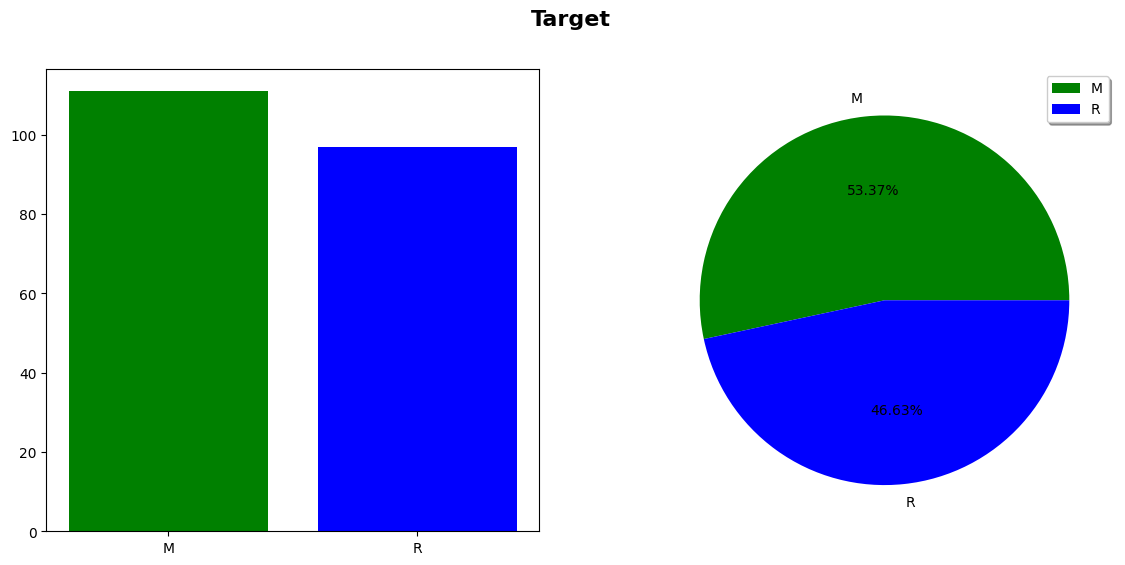

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.suptitle("Target",fontsize=16,weight='bold')
plt.bar(x=df.target.value_counts().index,height=df.target.value_counts(),color=["green","blue"])
plt.subplot(1,2,2)
plt.pie(x=df.target.value_counts(),labels=df.target.value_counts().index,autopct="%.2f%%",colors=["green","blue"])
plt.legend(shadow=True)
plt.show()

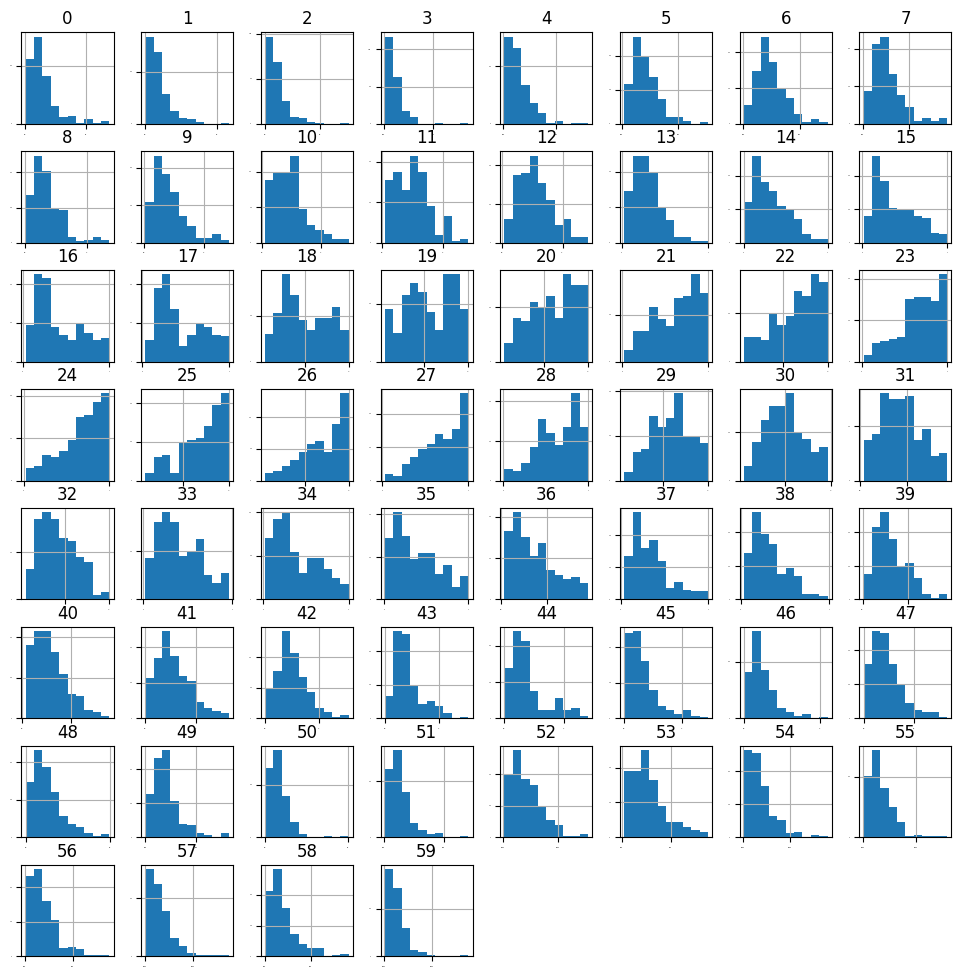

In [15]:
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,12))
plt.show()

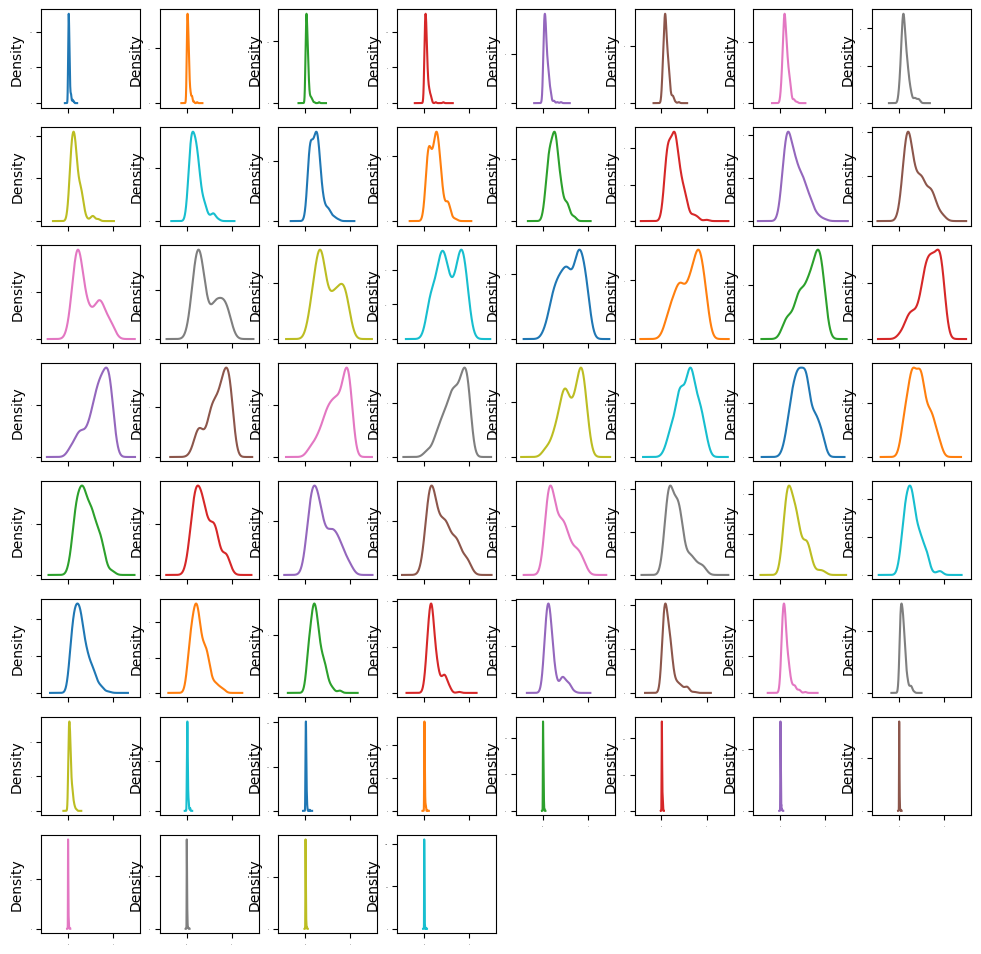

In [20]:
df.plot(kind="density",figsize=(12,12),fontsize=1,layout=(8,8),subplots=True,legend=False)
plt.show()

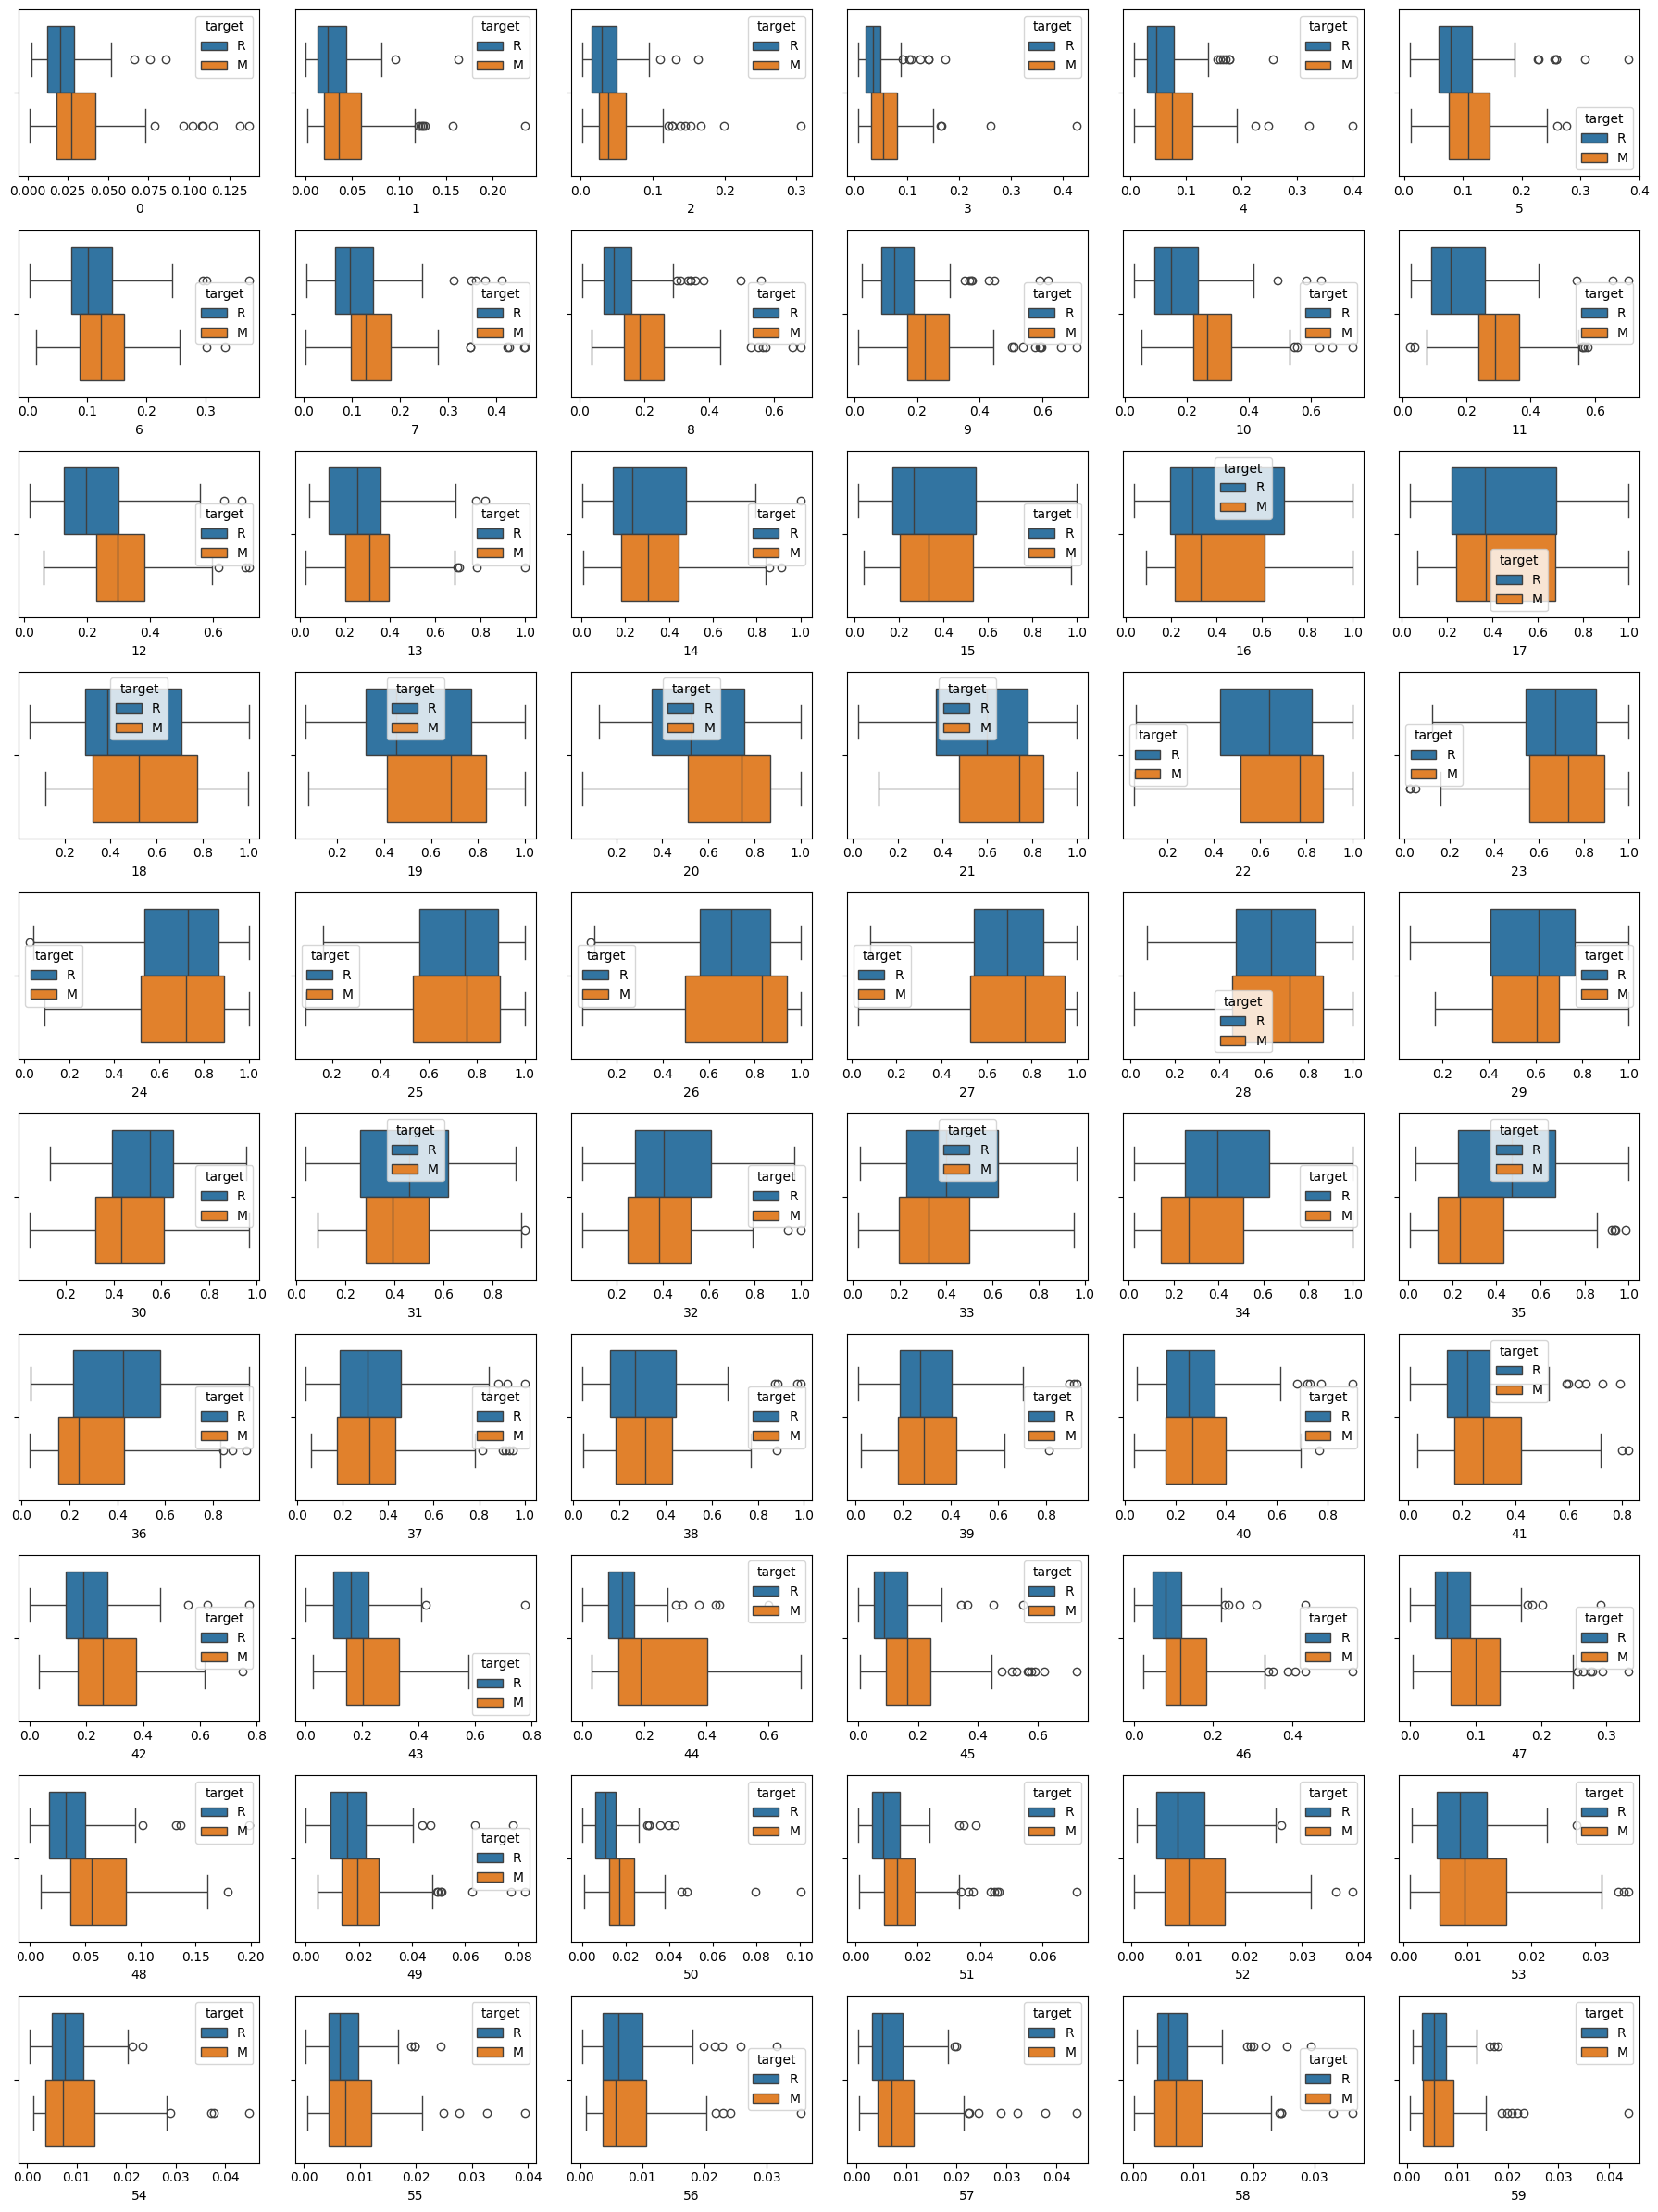

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

col = df.columns.to_list()
x = 0
f, ax = plt.subplots(10, 6, figsize=(18, 24))

for i in range(10):
    for j in range(6):
        sns.boxplot(data=df, x=col[x], hue='target', ax=ax[i, j])
        x += 1

plt.tight_layout()
plt.show()


In [30]:
df.target = df.target.map({"R":0,"M":1})

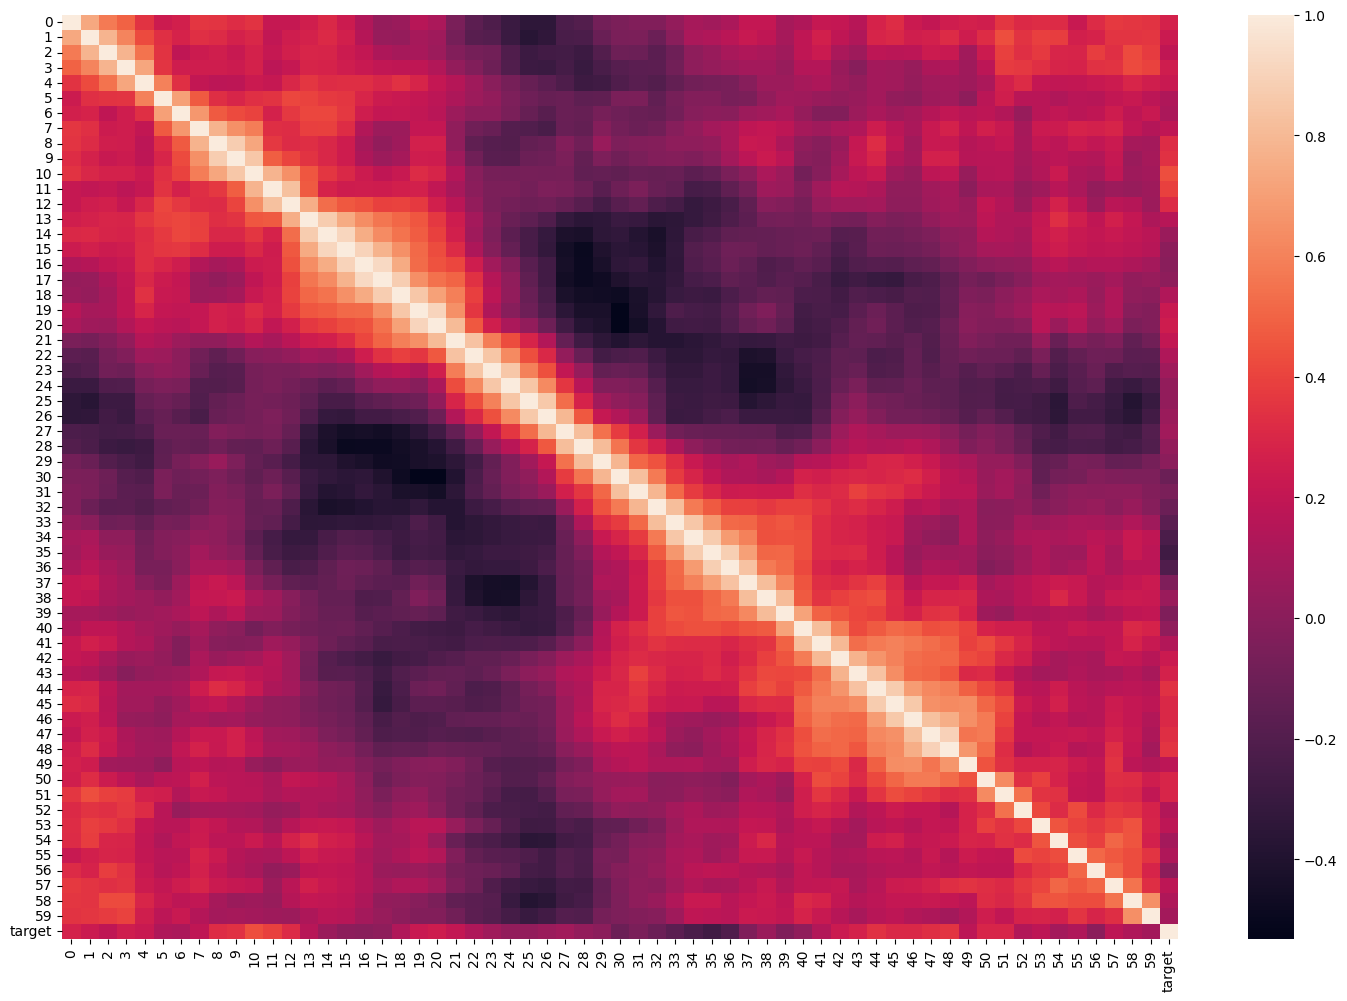

In [31]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr())
plt.show()

# Data Modeling

In [34]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: target, Length: 208, dtype: int64

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [52]:
x_train = x_train.values
x_test = x_test.values

In [63]:
def selection():
    acc = []
    for i in range(1,58):
        skb = SelectKBest(mutual_info_classif,k=i)
        skb.fit(x_train,y_train)
        sel_x_train = skb.transform(x_train)
        sel_x_test = skb.transform(x_test)
        gbc = GradientBoostingClassifier()
        gbc.fit(sel_x_train,y_train)
        acc.append(gbc.score(sel_x_test,y_test))
    return acc

In [64]:
acc = selection()

In [68]:
acc.index(max(acc))

12

In [69]:
skb = SelectKBest(mutual_info_classif,k=12)
skb.fit(x_train,y_train)
sel_x_train = skb.transform(x_train)
sel_x_test = skb.transform(x_test)

In [73]:
x.columns[skb.get_support()].to_list()

[4, 8, 10, 11, 15, 20, 36, 38, 42, 45, 48, 54]

In [84]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,auc,roc_curve,RocCurveDisplay

In [93]:
def kfold(model,model_name):
    acc = cross_val_score(model,sel_x_train,y_train,cv=10)
    acc = np.mean(acc)
    print(f"{model_name} Score on Cross Validation:{acc:.2f}")

def train(model,model_name):
    model.fit(sel_x_train,y_train)
    pred1 = model.predict(sel_x_train)
    pred2 = model.predict(sel_x_test)
    print(f"{model_name} Accuracy on training data: {f1_score(y_train,pred1):.2f}\n{model_name} Accuracy on testing data:{f1_score(y_test,pred2):.2f}")

def matrix(model):
    pred = model.predict(sel_x_test)
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt='.3g')
    plt.show()

def report(model):
    pred = model.predict(sel_x_test)
    print(classification_report(y_test,pred))

def roc(model,model_name):
    y_pred = model.decision_function(sel_x_test)
    fpr,tpr,_ = roc_curve(y_test,y_pred)
    sc = auc(fpr,tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,color="red",label=f"{model_name} (auc = %0.3f)"%sc)
    plt.plot([0, 1], [0, 1], color="blue", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend(shadow=True)
    plt.show()

In [94]:
lg = LogisticRegression()

In [95]:
kfold(lg,"Logistic Regression")

Logistic Regression Score on Cross Validation:0.76


In [96]:
train(lg,"Logistic Regression")

Logistic Regression Accuracy on training data: 0.79
Logistic Regression Accuracy on testing data:0.83


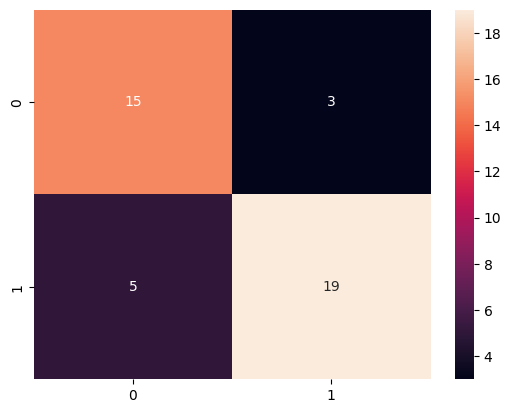

In [97]:
matrix(lg)

In [98]:
report(lg)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.86      0.79      0.83        24

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



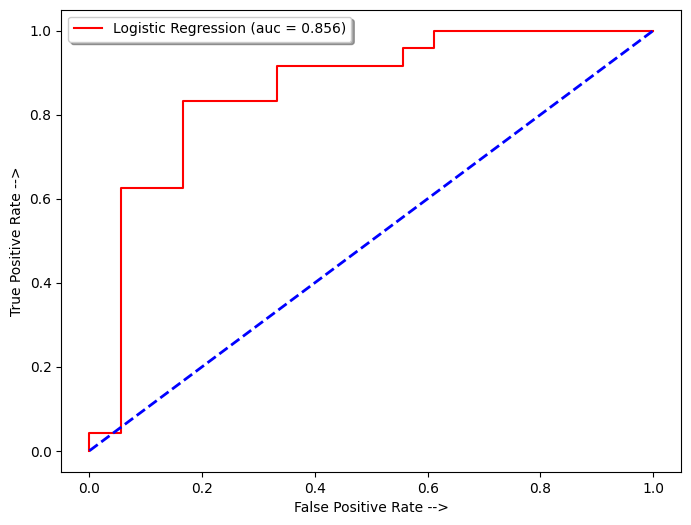

In [100]:
roc(lg,"Logistic Regression")

In [101]:
gbc = GradientBoostingClassifier(n_estimators=50)

In [102]:
kfold(gbc,'Gradient Boosting Classifier')

Gradient Boosting Classifier Score on Cross Validation:0.79


In [103]:
train(gbc,'Gradient Boosting Classifier')

Gradient Boosting Classifier Accuracy on training data: 1.00
Gradient Boosting Classifier Accuracy on testing data:0.78


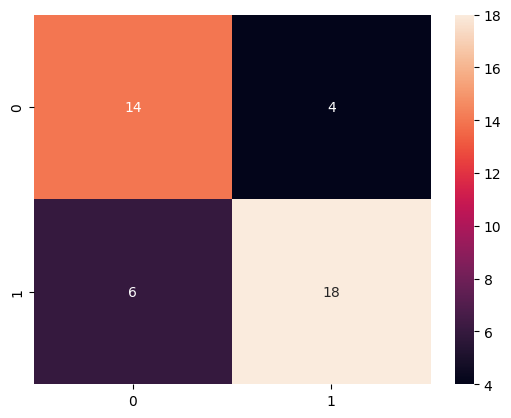

In [104]:
matrix(gbc)

In [105]:
report(gbc)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.82      0.75      0.78        24

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



In [106]:
svc = SVC(C=3)

In [107]:
kfold(svc,"SVC")

SVC Score on Cross Validation:0.84


In [108]:
train(svc,"SVC")

SVC Accuracy on training data: 0.92
SVC Accuracy on testing data:0.81


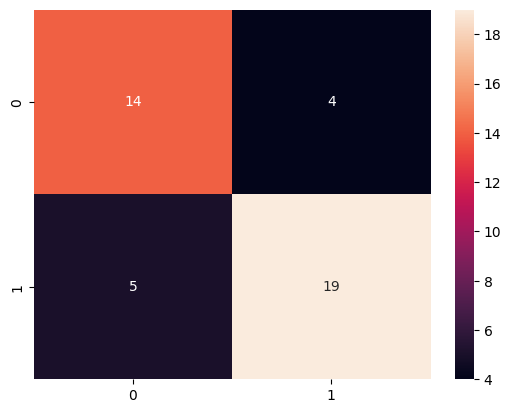

In [109]:
matrix(svc)

In [110]:
report(svc)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.83      0.79      0.81        24

    accuracy                           0.79        42
   macro avg       0.78      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42



In [111]:
xgb = XGBClassifier()

In [112]:
kfold(xgb,"XGBClassifier")

XGBClassifier Score on Cross Validation:0.83


In [113]:
train(xgb,"XGBClassifier")

XGBClassifier Accuracy on training data: 1.00
XGBClassifier Accuracy on testing data:0.78


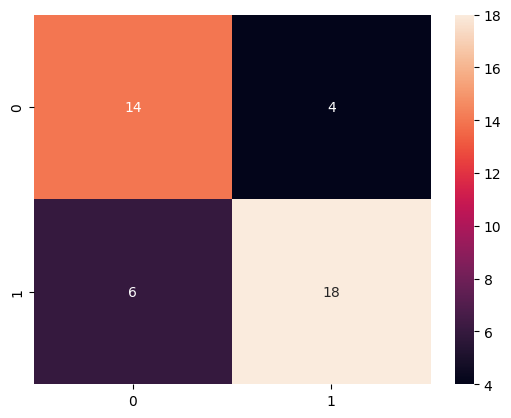

In [114]:
matrix(xgb)

In [115]:
report(xgb)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.82      0.75      0.78        24

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



In [116]:
import joblib

In [117]:
joblib.dump(svc,"SVC.joblib")

['SVC.joblib']